# Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data

,1:1,1:2,1:4,1:16,1:32
BL,61.00,20.00,6.00,3.00,1.00
BR,45.00,36.00,4.00,2.00,3.00
TL,43.00,18.00,13.00,1.00,1.00
TR,49.00,44.00,6.00,2.00,1.00
646,0.75,0.46,0.23,0.06,0.05
663,0.71,0.46,0.22,0.07,0.05
750,0.71,0.44,0.21,0.06,0.05


# Organize data

In [3]:
dilutions = ['1:1', '1:2', '1:4', '1:16', '1:32']
cell_counts = np.array([data[i].iloc[:4].sum() for i in dilutions]).reshape(-1, 1)

wavelengths = ['646', '663', '750'] # in nm
absorbance = np.array([np.array(data.loc[i]).reshape(-1, 1) for i in wavelengths], dtype=np.float64)


# Create standard curve

In [4]:
regressions = [LinearRegression().fit(a, cell_counts) for a in absorbance]
regression_lines = [[(x, regression.predict([[x]])[0][0]) for x in np.linspace(absorbance.min(), absorbance.max(), 100)] for regression in regressions]
predictions = [regression.predict(a) for regression, a in zip(regressions, absorbance)]

# Plot results

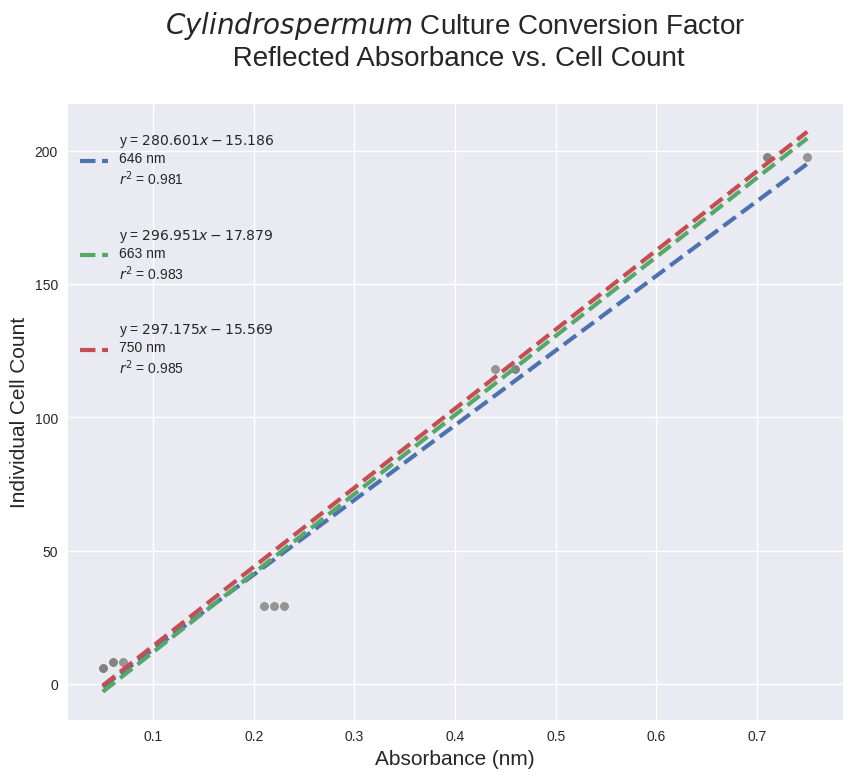

In [10]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn")

for a, rl, i, p, r in zip(absorbance, regression_lines, range(len(regression_lines)), predictions, regressions):
    sns.scatterplot(x=a.flatten(), y=cell_counts.flatten(), alpha=0.8, s=50, legend=False, color='gray')
    Xi, yi = [], []
    for x, y in rl:
        Xi.append(x)
        yi.append(y)
    
    sns.lineplot(x=Xi, y=yi, palette='Blues_d', linestyle='--', linewidth=3,
                 label=f"\ny = ${round(r.coef_[0][0], 3)}x {round(r.intercept_[0], 3)}$\n{wavelengths[i]} nm\n$r^2$ = {round(r2_score(cell_counts, p), 3)}\n") # only formats correctly when y_intercept is negative
    
plt.legend(loc='upper left')
plt.xlabel('Absorbance (nm)', fontsize=15)
plt.ylabel('Individual Cell Count', fontsize=15)
plt.title("$\itCylindrospermum$ Culture Conversion Factor\n Reflected Absorbance vs. Cell Count\n",  fontsize=20)

plt.show()
